## Model based learning: linear models
_Based on the example in Chapter 1: The Machine Learning Landscape from Hands-On Machine Learning with Scikit-Learn and TensorFlow by Aurelien Geron_


Machine learning algorithms can be classified/labeled in many ways. One way is to compare how algorithms generalise from training data to previously unseen examples. One class of algorithms uses similarity measures to compare a new, previously unseen datapoint to existing data points. This is called instance based learning. The k-nearest neighbours algorithm is an example of an instance-based learing algorithm. Another option, is to model the data using a model and learn the parameters of the model from the training data. When a previously unseen data point arrives, the model is used to make predictions about this data point. 

## Preparing the data 


In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import sklearn

In [6]:
#import data from Better Life Index
bli_2016 = pd.read_csv('data/bli_life_satisfaction2016.csv')
bli_2016.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.3,NaN,NaN
1,AUT,Austria,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.1,NaN,NaN
2,BEL,Belgium,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,6.9,NaN,NaN
3,CAN,Canada,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.4,NaN,NaN
4,CZE,Czech Republic,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,6.6,NaN,NaN


In [9]:
bli_2016_selection = bli_2016.loc[:,['Country', 'Value']]
bli_2016_selection.head()

,Country,Value
0,Australia,7.3
1,Austria,7.1
2,Belgium,6.9
3,Canada,7.4
4,Czech Republic,6.6


The GDP file from the IMF website is slightly harder to deal with, because the data is tab-separated and the file appears to have a strange format. 

```
Country	Subject Descriptor	Units	Scale	Country/Series-specific Notes	2015	Estimates Start After
Afghanistan	Gross domestic product per capita, current prices	U.S. dollars	Units	See notes for:  Gross domestic product, current prices (National currency) Population (Persons).	599.994	2013
Albania	Gross domestic product per capita, current prices	U.S. dollars	Units	See notes for:  Gross domestic product, current prices (National currency) Population (Persons).	3,995.383	2010
```

It is important to learn to use cli tools or simple Python scriptlets do deal with these kinds of situations when you can't use other tools, but in this case, to save some time, I'm importing this file into Libre Office as a tab-separated file, removing some unnecessary columns and then re-exporting the data as a CSV file. 

*Note*
The IMF GDP data is from 2015, while the Better Life Index data is from 2016. I should have checked the data dates before preparing and exporting, to make sure the datasets were from the same time range: something to remember in the future. 

In [11]:
imf_2015_gdp = pd.read_csv('data/imf_gdp_2015.csv')
imf_2015_gdp.head()

,Country 2015
0,Afghanistan\t599.994
1,Albania\t3995.383
2,Algeria\t4318.135
3,Angola\t4100.315
4,Antigua and Barbuda\t14414.302


As we can see from above, the CSV export from Libre Office did not work as expected and therefore the data is still tab separated. We can fix this by running a quick sed command on the file. 

In [12]:
imf_2015_gdp_mod = pd.read_csv('data/imf_gdp_2015_fin.csv')
imf_2015_gdp_mod.head()

,Country,2015
0,Afghanistan,599.994
1,Albania,3995.383
2,Algeria,4318.135
3,Angola,4100.315
4,Antigua and Barbuda,14414.302


### Join the datasets together

In [20]:
merged_data = pd.merge(imf_2015_gdp_mod, bli_2016_selection, how="inner", on='Country' )
merged_data.head()

,Country,2015,Value
0,Australia,50961.865,7.3
1,Australia,50961.865,7.3
2,Australia,50961.865,7.3
3,Australia,50961.865,7.4
4,Austria,43724.031,7.1


In [25]:
#rename the '2015' column for neater data presentation
merged_data.columns = ['Country', 'GDP', 'Value']
merged_data.head()

,Country,GDP,Value
0,Australia,50961.865,7.3
1,Australia,50961.865,7.3
2,Australia,50961.865,7.3
3,Australia,50961.865,7.4
4,Austria,43724.031,7.1


### Visualizing the dataset

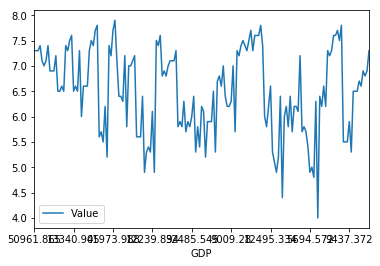

In [27]:
#todo: Scatter plot is not working at the moment, find out why
merged_data.plot(x="GDP", y="Value")

## Prepare dataset for training

In [38]:
X = np.c_[merged_data['GDP']]
y = np.c_[merged_data['Value']]
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
trained_model = linear_regression.fit(X, y)

## Use model to make predictions

In [40]:
gdp_antigua_barbuda = [[14414.302]] #2d matrix with one sample and one row
trained_model.predict(gdp_antigua_barbuda)

array([[ 6.05007978]])

The linear model predicts the BLI index value for Antigua and Barbuda at 6.05.